# Linear Regression 

In [1]:
#import all required modules 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#let's get data from CSV file 
#here we are going to take advertisment company data 
#they wants to create machine learning model which help them to predict 
#ROI on advertisments 
df=pd.read_csv("data/advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
'''
when we read data we come to knoe there is one Unnamed: 0 column avaiable 
now we say column as feature that feature is not important for me becasue 
i have already my data with index as well as it is not giving any business insights 
always before you start developing machine learning model check your each evry feature 
if feature not required dont take it for ml becasue useless feature 
will take more time to train your ml model currently it not make any sense 
as our data is very small 
'''

'\nwhen we read data we come to knoe there is one Unnamed: 0 column avaiable \nnow we say column as feature that feature is not important for me becasue \ni have already my data with index as well as it is not giving any business insights \nalways before you start developing machine learning model check your each evry feature \nif feature not required dont take it for ml becasue useless feature \nwill take more time to train your ml model currently it not make any sense \nas our data is very small \n'

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)
#df=df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
# as we can see in columns and we are already knowing that data is 
#for ROI calculation so i can see sales is independet and TV,radio,newspaper in independet 
#but it is my asumtion so lets see in detail 
df.describe() #statastical summary of all numeric features

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


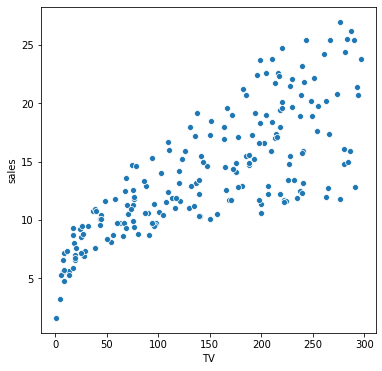

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x="TV",y="sales")
plt.show()

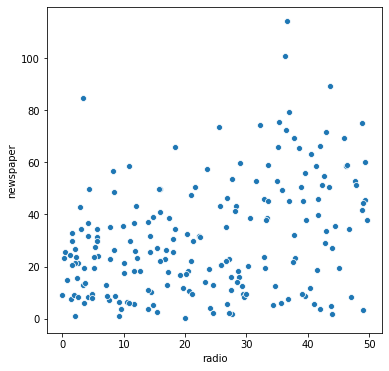

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x="radio",y="newspaper")
plt.show()

In [11]:
# now abserve your scatter plot which help me to find my data is 
#correlated or not yes i can say my data is no in good correlation but it is low correlation

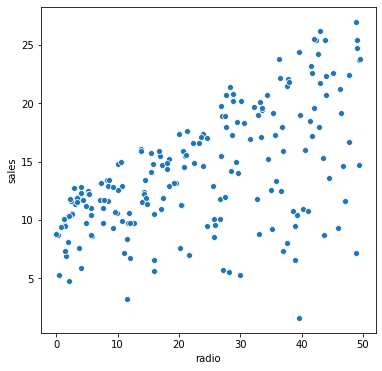

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x="radio",y="sales")
plt.show()

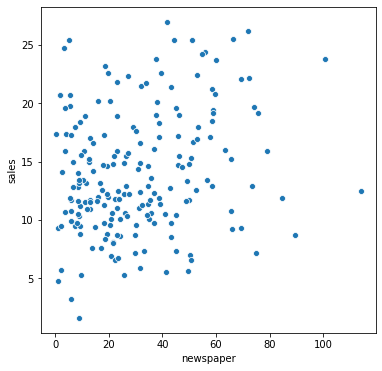

In [13]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x="newspaper",y="sales")
plt.show()

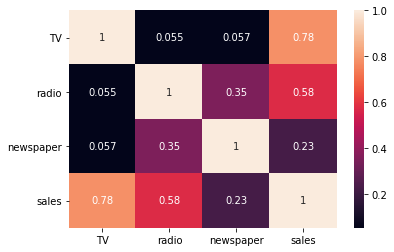

In [14]:
# as we know to do linear regression my data must be correlated and to check correlation 
#seaborn provides heatmap 
corr=df.corr()
plt.figure()
sns.heatmap(corr,annot=True)
plt.show()

# Modeling with TV

In [15]:
x=df[['TV']] #independet
y=df[['sales']] #dependent
x #independent variable total 200 records 

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [16]:
y #dependent variable # have 200 records 

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


# import sklearn for linear regression 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
'''
we have to divide our data into 2 part 
1)training data (which train our ml algorithm)70%
2)testing data(which lep to test our model and to check accuracy for the same)30%
so train_test_split will help us to divide our data randomly for training
and testing 
'''
x_train,x_test,Y_train,Y_test=train_test_split(x,y,random_state=1,test_size=0.3)
'''random_state : it will instruct pandas to select random data from given x,y using state 1 parameter if 
i am not giving state 1 then output will be different each time becasue your data will be selected in
diff diff random selections
test_size : where i can give percentage of test size 
now what it returns 
x_train,x_test,Y_train,Y_test
'''

'random_state : it will instruct pandas to select random data from given x,y using state 1 parameter if \ni am not giving state 1 then output will be different each time becasue your data will be selected in\ndiff diff random selections\ntest_size : where i can give percentage of test size \nnow what it returns \nx_train,x_test,Y_train,Y_test\n'

# Training 

In [19]:
# object of linear regression (here object is our model)
lr=LinearRegression()

In [20]:
#best fit line process it will perform internally 
lr.fit(x_train,Y_train) #it is creating bestfit line using yhat=theta0+theta1x formula 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("Intercept => ",lr.intercept_)

Intercept =>  [6.92351954]


In [22]:
print("slop =>",lr.coef_)

slop => [[0.04812204]]


# Testing 

In [23]:
y_pred=lr.predict(x_test)

In [24]:
y_pred #it is yhat of all trained x values 

array([[17.06764591],
       [16.66823297],
       [11.52879892],
       [20.4073156 ],
       [19.1368937 ],
       [20.57093054],
       [14.78184893],
       [15.62398466],
       [10.32093567],
       [17.2890073 ],
       [14.83959538],
       [10.25356482],
       [17.25532187],
       [12.20731971],
       [17.78947654],
       [12.97246017],
       [13.26119242],
       [20.91259704],
       [ 8.1554438 ],
       [17.06283371],
       [11.75497252],
       [10.18619396],
       [ 8.13138278],
       [12.09182681],
       [12.35649804],
       [15.98971218],
       [ 8.99757953],
       [18.89628349],
       [14.95027608],
       [18.47762173],
       [18.46799732],
       [18.2081383 ],
       [14.12738917],
       [15.11389102],
       [18.87703468],
       [15.82128503],
       [17.62586159],
       [13.15051172],
       [17.35637816],
       [ 7.86671155],
       [ 7.55391828],
       [11.2737521 ],
       [ 7.82340171],
       [16.74522823],
       [ 7.27481044],
       [14

In [25]:
Y_test

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6
198,25.5
95,16.9
4,12.9
29,10.5
168,17.1


# Evaluation MAtrix to check model accuracy 

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
'''
mean squared error contains scale of values thats why it is alwasy difficult to see in standard form 
where are r2 score is without scale always return answer between 0 to 1 positive and negative 
'''

'\nmean squared error contains scale of values thats why it is alwasy difficult to see in standard form \nwhere are r2 score is without scale always return answer between 0 to 1 positive and negative \n'

In [27]:
mse=mean_squared_error(Y_test,y_pred)

In [28]:
mse

10.571057434656955

In [29]:
r2=r2_score(Y_test,y_pred)

In [30]:
r2

0.575061860494331

In [31]:
x_train

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
...,...
133,219.8
137,273.7
72,26.8
140,73.4


In [32]:
lr.predict([[150]]) # x value i am giving my investment on tv advertisment return y of given x 

array([[14.14182578]])

In [33]:
# perform same process for radio and newspaper and check which advertisment medium give more ROI 
# and write summery for the same 
'''
steps to develop machine leaning model 
1) collect business requiment 
2) collect data according requirment 
3) clean and analyz collected data 
4) select featurs 
5) if we want to do linear regression then check correlation if found 
6) split data into train test randomaly intially use random_state=1 later you can ignore this parameter 
7) create objecy of machine learning model 
8) train model 
9) check accuracy (use test data for accuracy check )
10) predict something with trained 
11) intigrate your model with some application (deployment of our project)
'''
'''
whatever we have seen it is single linear model 
not today we will make multiple linear model 
where we have more than 1 independent featurs formula for 
multiple linear regression is 

yhat=theta0+theta1x1+theta2x2+theta3x4+theta4xn

'''

'\nwhatever we have seen it is single linear model \nnot today we will make multiple linear model \nwhere we have more than 1 independent featurs formula for \nmultiple linear regression is \n\nyhat=theta0+theta1x1+theta2x2+theta3x4+theta4xn\n\n'

In [34]:
y_pred=lr.predict(x_train) #prediction of y_train
xx_train =np.array(x_train.values.tolist()) 
yy_pred=np.array(y_pred)

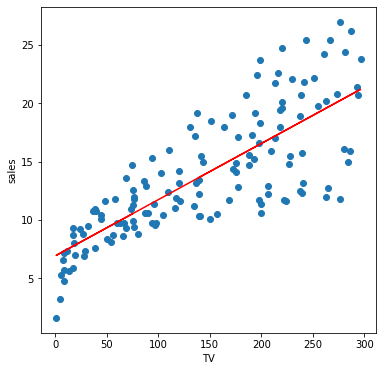

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(x_train,Y_train)
plt.plot(xx_train.flatten(),yy_pred.flatten(),"red")
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()
#plot of bestfit line 

In [36]:
x=df[["TV","radio"]]
y=df["sales"]

In [37]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [38]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [40]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
mlr.intercept_

2.9647671191401574

In [42]:
mlr.coef_

array([0.04697554, 0.17765046])

In [43]:
y_pred=mlr.predict(x_test)

In [44]:
y_pred

array([21.6786746 , 16.43892004,  7.70903733, 17.92158421, 18.67111499,
       23.74835071, 16.24962798, 13.37657045,  9.12364788, 17.27585015,
       14.40513872,  9.85730919, 17.31402746, 16.61437382, 15.02857874,
       15.42489496, 12.42021473, 17.34892466, 11.09570896, 18.10320281,
        9.38655615, 12.65171582,  8.70947008, 10.49704698, 11.35942404,
       15.03043294,  9.73268033, 19.46660993, 18.26160716, 17.21035792,
       21.60669421, 14.58454377, 16.32136242, 12.3456783 , 19.99853614,
       15.38120487, 14.01613968, 10.05601014, 20.94792024,  7.45626202,
        3.65120693,  7.26465144,  5.99278035, 18.39717578,  8.2996665 ,
       14.13011074, 14.95229617, 20.37261349, 20.60678937, 19.48376432,
       24.08819667, 14.89416249,  6.71850002, 19.74995269, 18.99448081,
       12.52042181, 14.18823598,  6.09331077, 15.39558485,  9.58586241])

In [45]:
mse=mean_squared_error(y_test,y_pred)
mse

1.9147050289721803

In [46]:
r2=r2_score(y_test,y_pred)
r2

0.92303218502568

In [47]:
'''
when we only invest on one medium we are not gettting 
good ROI but when i invest 
'''

'\nwhen we only invest on one medium we are not gettting \ngood ROI but when i invest \n'

In [48]:
p=mlr.predict([[200,150]])

In [49]:
p

array([39.00744484])

# Assumption of Linear Regression(single,multiple)

In [50]:
'''
1)Data must be continuous 
2)data mut be correlated (homoskedastic correlation)
in above example our data is low correlated in TV and Radio but it have hetrosckedastci correlation pattern 
due to that we did not get accuracy as well i can come on conclusion i should use some other ML model not linear regression 
3)no correlation between independet features here we have taken 2 independet featurs 
  TV and radio assumention is saying that if radio and TV both have correation then select any one of it 
  to save our processing time while training our model 

  temp  shark-attach icecreamsale
  15    2             100
  45    90            5000
  
  above example is in data science known as multicolinirity 
  and also known as corelation cousation 
4)your data must be normaly distributed 
5)whenever we have high outlier linear regression is not good not even suggested by experts   
'''

'\n1)Data must be continuous \n2)data mut be correlated (homoskedastic correlation)\nin above example our data is low correlated in TV and Radio but it have hetrosckedastci correlation pattern \ndue to that we did not get accuracy as well i can come on conclusion i should use some other ML model not linear regression \n3)no correlation between independet features here we have taken 2 independet featurs \n  TV and radio assumention is saying that if radio and TV both have correation then select any one of it \n  to save our processing time while training our model \n\n  temp  shark-attach icecreamsale\n  15    2             100\n  45    90            5000\n  \n  above example is in data science known as multicolinirity \n  and also known as corelation cousation \n4)your data must be normaly distributed \n5)whenever we have high outlier linear regression is not good not even suggested by experts   \n'

In [51]:
x=df[["TV","radio"]]
y=df["sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
mlr=LinearRegression()
mlr.fit(x_train,y_train)
y_pred=mlr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [52]:
y_pred

array([21.6786746 , 16.43892004,  7.70903733, 17.92158421, 18.67111499,
       23.74835071, 16.24962798, 13.37657045,  9.12364788, 17.27585015,
       14.40513872,  9.85730919, 17.31402746, 16.61437382, 15.02857874,
       15.42489496, 12.42021473, 17.34892466, 11.09570896, 18.10320281,
        9.38655615, 12.65171582,  8.70947008, 10.49704698, 11.35942404,
       15.03043294,  9.73268033, 19.46660993, 18.26160716, 17.21035792,
       21.60669421, 14.58454377, 16.32136242, 12.3456783 , 19.99853614,
       15.38120487, 14.01613968, 10.05601014, 20.94792024,  7.45626202,
        3.65120693,  7.26465144,  5.99278035, 18.39717578,  8.2996665 ,
       14.13011074, 14.95229617, 20.37261349, 20.60678937, 19.48376432,
       24.08819667, 14.89416249,  6.71850002, 19.74995269, 18.99448081,
       12.52042181, 14.18823598,  6.09331077, 15.39558485,  9.58586241])

In [53]:
mse

1.9147050289721803

In [54]:
r2

0.92303218502568

In [55]:
error=y_test - y_pred

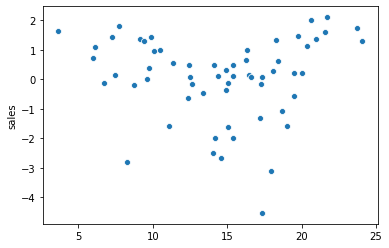

In [56]:
plt.figure()
sns.scatterplot(y_pred,error)
plt.show() 
# here we can see our all those data which is outliers 

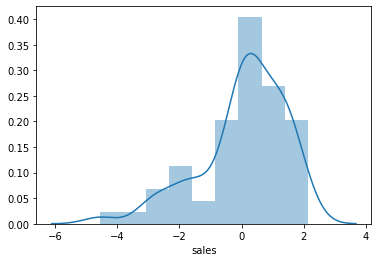

In [57]:
#check your data is normalized or not 
plt.figure()
sns.distplot(error)
plt.show()

In [58]:
# after assumption i can say that i should use some another type of ml
#model to do prediction on advertisement data.
'''becasue 1) it is hetroskedastic 
        2) outlier exist 
        3) it is not normally distributed '''

'becasue 1) it is hetroskedastic \n        2) outlier exist \n        3) it is not normally distributed '

# Gradient Descent 

In [59]:
def gradient_descent(x,y):
    n=len(x)
    learning_rate=2.5 #learning rate is known as alpha values
    intercept=slop=0
    iterations =2000
    for i in range(iterations):
        y_pred=x*slop + intercept 
        mse=mean_squared_error(y_pred,y)
        r2=r2_score(y_pred,y)
        
        md=(2/n)*sum(x*(y-y_pred)) #change value of slop 
        bd=(2/n)*sum(y-y_pred) #change value of intercept 
        
        slop=slop+(learning_rate *md)
        intercept=intercept +(learning_rate * bd)
        print("slop: ",slop,"intercept:",intercept,"mse:",mse,"iteration:",i,"r2score :",r2)       

In [60]:
x=np.array([10,12,13,14,15,20,21])
y=np.array([12,12,13,15,16,26,27])

In [61]:
gradient_descent(x,y)

slop:  1407.1428571428569 intercept: 86.42857142857142 mse: 334.7142857142857 iteration: 0 r2score : 0.0
slop:  -1687213.7755102038 intercept: -105795.0 mse: 476659239.39358586 iteration: 1 r2score : -15.8511550529001
slop:  2024879585.4956262 intercept: 126964299.5918367 mse: 686539436935084.8 iteration: 2 r2score : -15.881977001750695
slop:  -2430121231266.1587 intercept: -152373826024.11075 mse: 9.88833032395296e+20 iteration: 3 r2score : -15.881949700568292
slop:  2916464388843961.0 intercept: 182868587649144.75 mse: 1.424231024981211e+27 iteration: 4 r2score : -15.88194972424403
slop:  -3.500140002051722e+18 intercept: -2.1946630351389357e+17 mse: 2.051341274072796e+33 iteration: 5 r2score : -15.881949724223766
slop:  4.200627335216229e+21 intercept: 2.6338836536793478e+20 mse: 2.9545775572260927e+39 iteration: 6 r2score : -15.88194972422378
slop:  -5.041304061843939e+24 intercept: -3.1610060360268893e+23 mse: 4.255522302406673e+45 iteration: 7 r2score : -15.88194972422378
slop:  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:243: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:555: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:562: RuntimeWarning: invalid value encountered in true_divide
  denominator[valid_score])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:243: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:552: RuntimeWarning: o

 -1.5438580639054045e+160 intercept: -9.680321993886596e+158 mse: inf iteration: 51 r2score : nan
slop:  1.8528322813183327e+163 intercept: 1.161765676726608e+162 mse: inf iteration: 52 r2score : nan
slop:  -2.223641889728565e+166 intercept: -1.3942712736956556e+165 mse: inf iteration: 53 r2score : nan
slop:  2.668662082159665e+169 intercept: 1.6733085023912062e+168 mse: inf iteration: 54 r2score : nan
slop:  -3.2027447142696595e+172 intercept: -2.0081897956293137e+171 mse: inf iteration: 55 r2score : nan
slop:  3.843713961897007e+175 intercept: 2.4100912948847616e+174 mse: inf iteration: 56 r2score : nan
slop:  -4.612961175162229e+178 intercept: -2.892425836602295e+177 mse: inf iteration: 57 r2score : nan
slop:  5.536158781454165e+181 intercept: 3.47129058471808e+180 mse: inf iteration: 58 r2score : nan
slop:  -6.6441170627008796e+184 intercept: -4.1660042484294958e+183 mse: inf iteration: 59 r2score : nan
slop:  7.97381240053193e+187 intercept: 4.999751814019377e+186 mse: inf iterati

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
x=df[["TV","radio"]]

In [63]:
y=df["sales"]

In [64]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [65]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [67]:
from sklearn.linear_model.stochastic_gradient import SGDRegressor

In [68]:
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [69]:
y_pred=sgdr.predict(x_test)

In [70]:
y_pred 

array([3.05729242e+13, 2.77128174e+13, 1.25327240e+13, 3.69631865e+13,
       3.42819156e+13, 3.94906369e+13, 2.32517959e+13, 2.41537609e+13,
       1.02420970e+13, 2.94662332e+13, 2.27067155e+13, 1.03555452e+13,
       2.94018819e+13, 1.73929577e+13, 2.98033765e+13, 1.87359148e+13,
       1.83011301e+13, 3.79284569e+13, 5.92758403e+12, 2.92445226e+13,
       1.36772261e+13, 1.12281695e+13, 4.99248529e+12, 1.48704879e+13,
       1.58043109e+13, 2.56144136e+13, 7.38584180e+12, 3.40148618e+13,
       2.43850856e+13, 3.22090646e+13, 3.38062649e+13, 3.06143913e+13,
       2.17547151e+13, 2.25865417e+13, 3.41660137e+13, 2.53515584e+13,
       2.90495183e+13, 1.71725080e+13, 3.09758509e+13, 3.91468061e+12,
       1.78475605e+12, 1.17752929e+13, 3.27471543e+12, 2.86134726e+13,
       2.84751156e+12, 2.06786065e+13, 1.32407356e+13, 3.20185620e+13,
       2.95283118e+13, 3.18591450e+13, 4.02991737e+13, 1.82491348e+13,
       3.62048549e+12, 2.67033476e+13, 3.57229100e+13, 2.21356130e+13,
      

In [71]:
mse=mean_squared_error(y_test,y_pred)

In [72]:
mse

5.970287093684376e+26

In [73]:
r2=r2_score(y_test,y_pred)

In [74]:
r2

-2.399951665750528e+25

In [75]:
#steps to calculate VIF multicoliniarity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [76]:
x=df[['radio','newspaper']]

In [77]:
'''
VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
'''

'\nVIF starts at 1 and has no upper limit\nVIF = 1, no correlation between the independent variable and the other variables\nVIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others\n'

In [78]:
VIF_DATA=calc_vif(x)

In [79]:
VIF_DATA

,variables,VIF
0,radio,2.749708
1,newspaper,2.749708


In [80]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


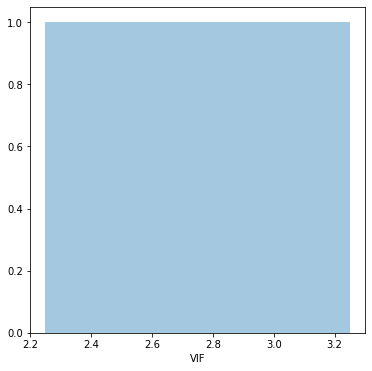

In [81]:
plt.figure(figsize=(6,6))
sns.distplot(VIF_DATA['VIF'])
#uplt.show()

In [82]:
# here we can see radio and newspaper have alost same VIF and that means we can use any of it 
#but in case if we have radio VIF low as compared to newspaper then we can remove newspaper also 
#it will dependes on always business requirments.

# Plynomial Regression 

In [83]:
# Linear line
def poly_1(x):
    y=4*x+5
    return y

# quadratic
def poly_2(x):
    y=6*(x**2)+4*x+5
    return y
# cubic
def poly_3(x):
    y=8*(x**3)+6*(x**2)+4*x+5
    return y

def poly_4(x):
    y=10*(x**4)+8*(x**3)+6*(x**2)+4*x+5
    return y
    
def plot(x,y):
    plt.figure()
    plt.plot(x,y)
    plt.show()
    
x=np.arange(-100,100)

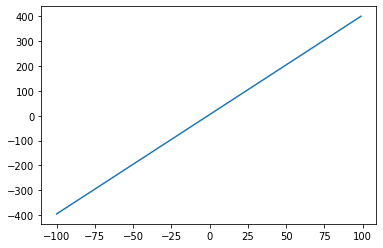

In [84]:
y=poly_1(x)
plot(x,y)

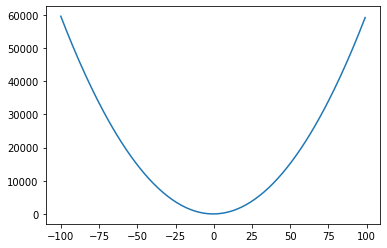

In [85]:
y=poly_2(x)
plot(x,y)

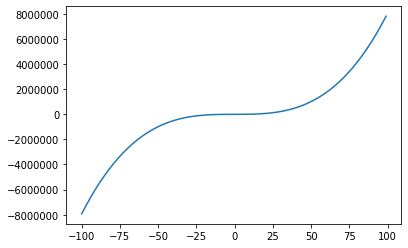

In [86]:
y=poly_3(x)
plot(x,y)

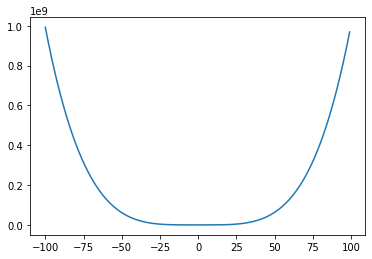

In [87]:
y=poly_4(x)
plot(x,y)

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
df=pd.read_csv("data//advertising.csv")
x=df[["TV"]]
y=df["sales"]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


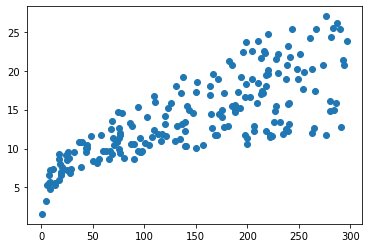

In [90]:
#Let's plot our data
plt.figure()
plt.scatter(x,y)
plt.show()

In [105]:
#here we will create an object of PolunomialFeature class and 
#will convert our normal features into quadratic or cubic or according data 
#to check how my data is scattered we can use scatter plot and according 
#we can decide which kind of polynomial line we required 
pf=PolynomialFeatures(2) #here we use 2 that means we are going to use quadratic line 
x_poly=pf.fit_transform(x)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=1,test_size=0.03)

In [106]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_pred=lr.predict(x_test)

In [108]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [109]:
mse

17.93616345742686

In [110]:
r2

0.3832602157987248

In [111]:
rss=y_test- y_pred

In [112]:
rss

58     6.591466
40    -0.289449
34    -2.430080
102   -4.702120
184   -1.108456
198    5.902701
Name: sales, dtype: float64

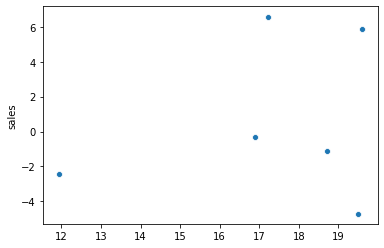

In [113]:
plt.figure()
sns.scatterplot(y_pred,rss)
plt.show()

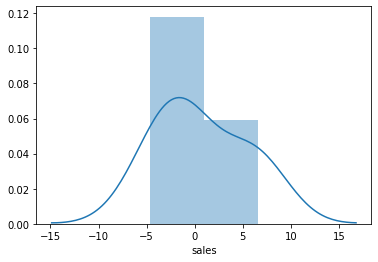

In [114]:
plt.figure()
sns.distplot(rss)
plt.show()

In [115]:
'''
i can come on conclusion as per assumtion and data pattern of our advertisment here it is better to use 
polynomial regression instead of linear regression 

'''

'\ni can come on conclusion as per assumtion and data pattern of our advertisment here it is better to use \npolynomial regression instead of linear regression \n\n'

In [103]:
'''
what is overfit and underfit into machine learning ?

1) overfit : situation may come when we use each and every observation of our data into consideration to train our model
             and because during training my model r2 score will be very good 
             but when we do test at that time r2 score will be bad becasue my model is able to predict exact data which is 
             provided into training data set so testing data will be difficult for my ml model and it will increas error 
             this situation often happen when we use polynomial regression becasue here our regression line will be curvy or squagly 
             to get rid of it we have concept of regularisation it will help me to make my model balances or regularised instead 
             overfitted model also help me to get rid of bias variance issues which happend due to underfit and overfit models

2) underfit : situation happen when we have very less data pattern to train our model solution of this to have more data will all possible 
             patterns 
             
             
bias : means error term or residual how much diff between predicted data point to original data point 
variance : means distance between original one data point to another data point same way predicted data point to another 
           predicted data point 
           
as a machine learning engineer it is our duty to get rid out of bias variance issues mostly happen in overfit and underfit 
situation the solution of bias variance known as bias variance tradeoff 
that can be possible in linear regression & polynomial using regularisation 

'''

'\nwhat is overfit and underfit into machine learning ?\n\n1) overfit : situation may come when we use each and every observation of our data into consideration to train our model\n             and because during training my model r2 score will be very good \n             but when we do test at that time r2 score will be bad becasue my model is able to predict exact data which is \n             provided into training data set so testing data will be difficult for my ml model and it will increas error \n             this situation often happen when we use polynomial regression becasue here our regression line will be curvy or squagly \n             to get rid of it we have concept of regularisation it will help me to make my model balances or regularised instead \n             overfitted model also help me to get rid of bias variance issues which happend due to underfit and overfit models\n\n2) underfit : situation happen when we have very less data pattern to train our model solution o

In [ ]:
#steps to plot regression line using polynomial 

In [116]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [117]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [118]:
pf=PolynomialFeatures(2) #here we use 2 that means we are going to use quadratic line 
x_poly=pf.fit_transform(x)

In [119]:
lr2=LinearRegression()
lr2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_pred=lr2.predict(x_poly)

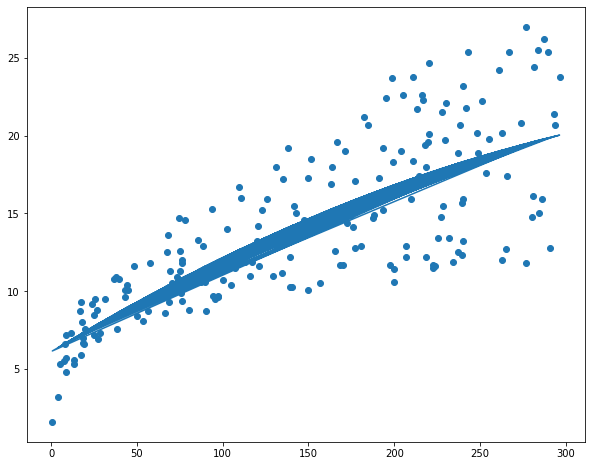

In [122]:
plt.figure(figsize=(10,8));
plt.scatter(x, y);
plt.plot(x, y_pred);
